In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [239]:
df = pd.read_csv('Online_Retail.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [240]:
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [241]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
# df['CustomerID'] = df['CustomerID'].astype('object')
df['CustomerID'] = df['CustomerID'].astype('Int64').astype('object')
print(df.dtypes)

/var/folders/kt/3_xkvbt50nl1g9rk19fkhzq00000gn/T/ipykernel_8594/1128443421.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object


In [242]:
# Check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

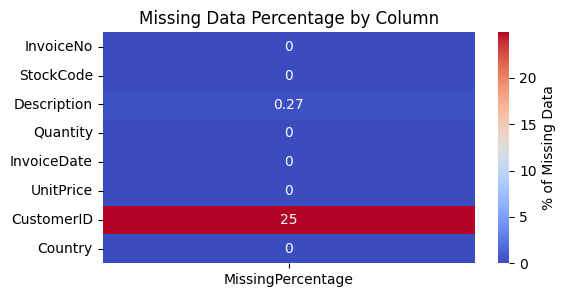

In [243]:
missing_percentage = df.isnull().mean() * 100

missing_percentage_df = pd.DataFrame(missing_percentage, columns=['MissingPercentage'])

# Plot the heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(missing_percentage_df, annot=True, cmap='coolwarm', cbar_kws={'label': '% of Missing Data'})
plt.title('Missing Data Percentage by Column')
plt.show()

/var/folders/kt/3_xkvbt50nl1g9rk19fkhzq00000gn/T/ipykernel_8594/2517381834.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_by_country.values, y=missing_by_country.index, palette='viridis')
/var/folders/kt/3_xkvbt50nl1g9rk19fkhzq00000gn/T/ipykernel_8594/2517381834.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = f'{missing_percentage[index]:.2f}%'


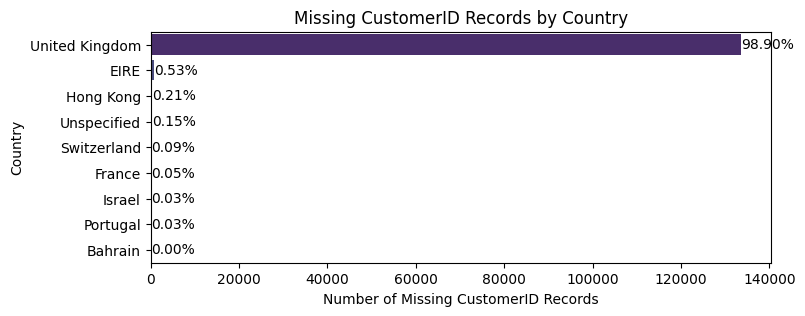

In [244]:
missing_customer_id_df = df[df['CustomerID'].isnull()]

missing_by_country = missing_customer_id_df.groupby('Country').size().sort_values(ascending=False)

# Calculate the percentage of missing CustomerID entries for each country
total_missing = missing_by_country.sum()
missing_percentage = (missing_by_country / total_missing) * 100

# Visualize the missing CustomerID entries by country using a bar plot
plt.figure(figsize=(8, 3))
sns.barplot(x=missing_by_country.values, y=missing_by_country.index, palette='viridis')

# Add percentage labels to each bar
for index, value in enumerate(missing_by_country):
    percentage = f'{missing_percentage[index]:.2f}%'
    plt.text(value + 50, index, percentage, color='black', va="center")

plt.title('Missing CustomerID Records by Country')
plt.xlabel('Number of Missing CustomerID Records')
plt.ylabel('Country')
plt.show()

In [245]:
df = df.dropna(subset=['CustomerID'])

In [246]:
df_cancelled = df[df['InvoiceNo'].str.startswith('C')]
df_cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


/var/folders/kt/3_xkvbt50nl1g9rk19fkhzq00000gn/T/ipykernel_8594/574370493.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


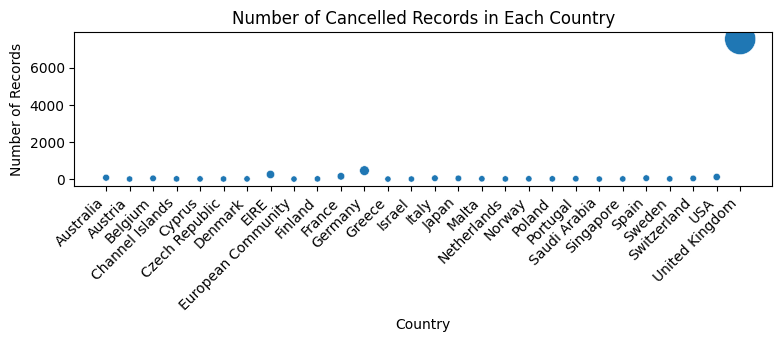

In [247]:
# Group by Country and count the number of records
cancelled_records_by_country = df_cancelled.groupby('Country').size().reset_index(name='RecordCount')

# Plot a bubble plot
plt.figure(figsize=(9,2))
sns.scatterplot(
    x='Country', 
    y='RecordCount', 
    size='RecordCount', 
    sizes=(20, 500), 
    data=cancelled_records_by_country, 
    legend=False, 
    palette='viridis'
)

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Number of Cancelled Records in Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Records')

plt.show()

In [248]:
df = df[~df['InvoiceNo'].str.startswith('C')]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [249]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Reorder columns to place TotalPrice at index 6
cols = df.columns.tolist()
# Remove TotalPrice from its current position
cols.remove("TotalPrice")
# Insert TotalPrice at index 6
cols.insert(6, "TotalPrice")

# Reorder DataFrame columns
df = df[cols]

In [250]:
# Display the updated DataFrame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850,United Kingdom


In [251]:
max_date = df["InvoiceDate"].max()
min_date = df["InvoiceDate"].min()

In [252]:
print("The data range is from ", min_date , " to ", max_date)

The data range is from  2010-12-01 08:26:00  to  2011-12-09 12:50:00


In [253]:
# Create 'Month' and 'DayOfWeek' columns
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Map month numbers to month names
month_mapping = {i: calendar.month_name[i] for i in range(1, 13)}

# Apply the mapping to get month names
df['Month'] = df['Month'].map(month_mapping)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country,Month,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850,United Kingdom,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850,United Kingdom,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850,United Kingdom,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850,United Kingdom,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850,United Kingdom,December,Wednesday


In [254]:
columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Month', 'DayOfWeek', 'UnitPrice', 'TotalPrice', 'CustomerID', 'Country']
df = df[columns]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Month,DayOfWeek,UnitPrice,TotalPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,December,Wednesday,2.55,15.30,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,December,Wednesday,3.39,20.34,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,December,Wednesday,2.75,22.00,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,December,Wednesday,3.39,20.34,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,December,Wednesday,3.39,20.34,17850,United Kingdom


/var/folders/kt/3_xkvbt50nl1g9rk19fkhzq00000gn/T/ipykernel_8594/3375739001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='TotalPrice', data=country_total_price, palette='viridis')


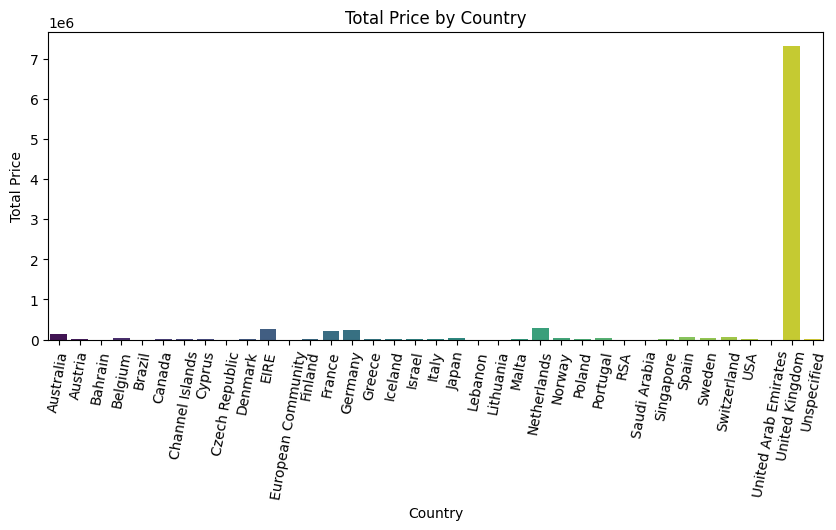

In [259]:
# Group by 'Country' and sum the 'TotalPrice'
country_total_price = df.groupby('Country')['TotalPrice'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 4))
sns.barplot(x='Country', y='TotalPrice', data=country_total_price, palette='viridis')

# Add titles and labels
plt.title('Total Price by Country')
plt.xlabel('Country')
plt.ylabel('Total Price')

# Rotate x-axis labels if needed
plt.xticks(rotation=80)

# Show the plot
plt.show()

/var/folders/kt/3_xkvbt50nl1g9rk19fkhzq00000gn/T/ipykernel_8594/1724858167.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='TotalPrice', data=monthly_total_price, palette='viridis')


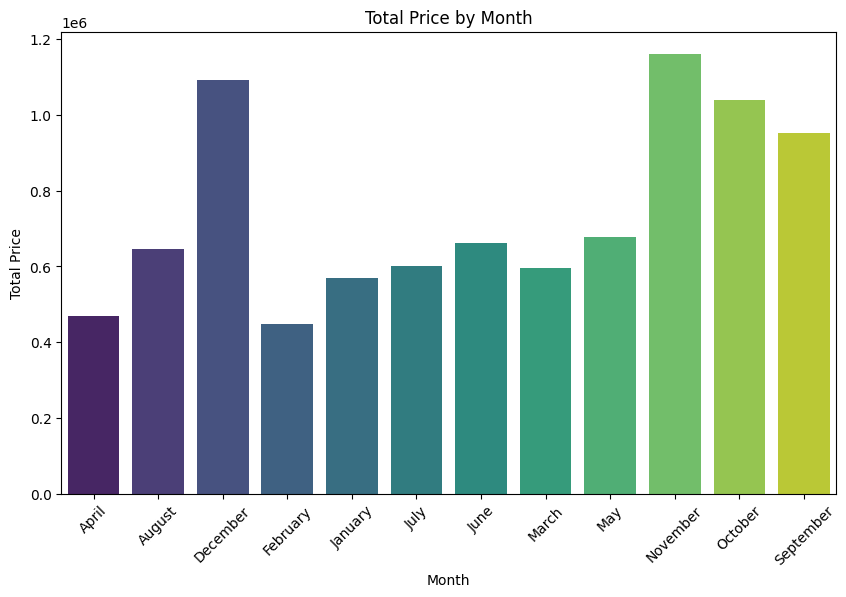

In [256]:
# Group by 'Month' and aggregate 'TotalPrice'
monthly_total_price = df.groupby('Month')['TotalPrice'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='TotalPrice', data=monthly_total_price, palette='viridis')

plt.title('Total Price by Month')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

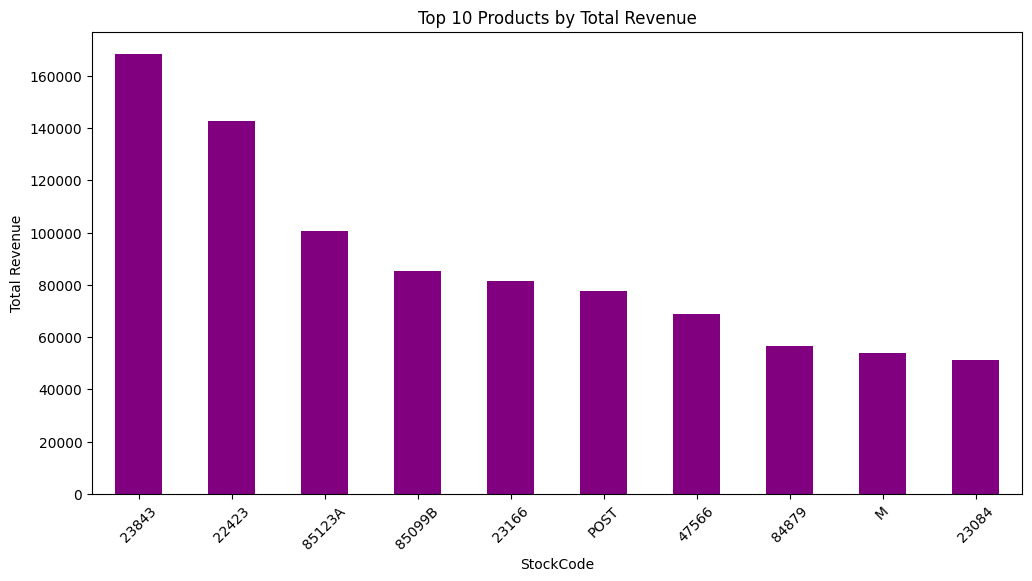

In [260]:
# Group by StockCode and sum TotalPrice
sales_by_product = df.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False)

# Plot the top 10 products
plt.figure(figsize=(12, 6))
sales_by_product.head(10).plot(kind='bar', color='purple')
plt.ylabel('Total Revenue')
plt.title('Top 10 Products by Total Revenue')
plt.xticks(rotation=45)
plt.show()

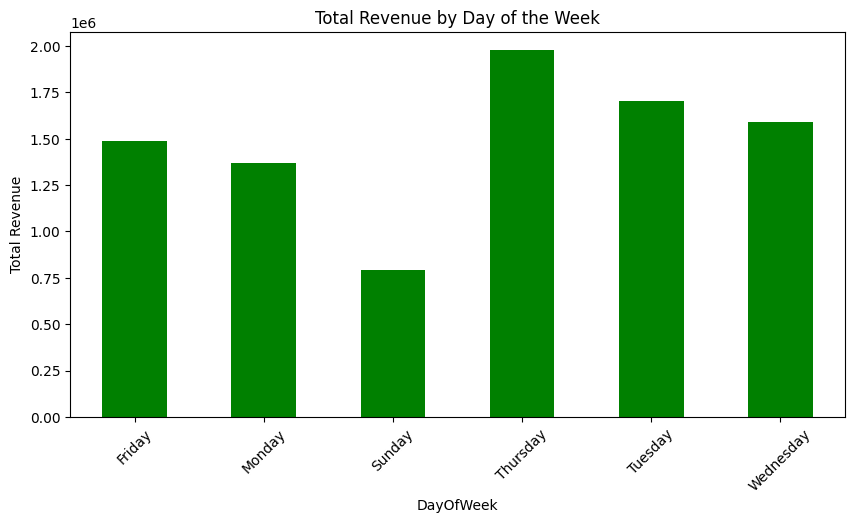

In [261]:
# Group by DayOfWeek and sum TotalPrice
sales_by_day = df.groupby('DayOfWeek')['TotalPrice'].sum()

# Plot sales by day of the week
plt.figure(figsize=(10, 5))
sales_by_day.plot(kind='bar', color='green')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Day of the Week')
plt.xticks(rotation=45)
plt.show()